# Data information

The size of the data is: (1190, 12)
The number of missing values in each feature is:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
The distribution of the target variable is:
1    629
0    561
Name: target, dtype: int64


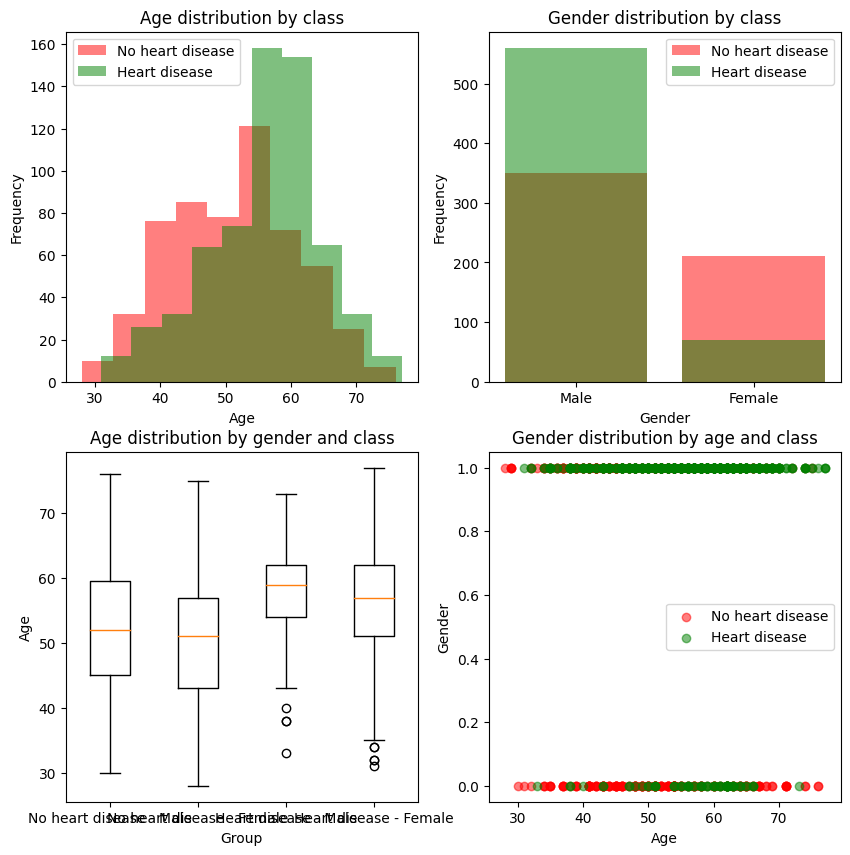

In [15]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a csv file
data = pd.read_csv("/content/Heart_Disease_Dataset.csv")

# 1) The size of the data
print("The size of the data is:", data.shape)

# 2) Checking whether the data in each sample has a deleted feature or not
print("The number of missing values in each feature is:")
print(data.isnull().sum())

# 3) Checking the balance of two classes
print("The distribution of the target variable is:")
print(data["target"].value_counts())

# 4) Drawing the graph of age distribution and gender distribution for each class (four graphs in total)
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the age distribution for each class
axes[0, 0].hist(data[data["target"] == 0]["age"], bins=10, color="red", alpha=0.5, label="No heart disease")
axes[0, 0].hist(data[data["target"] == 1]["age"], bins=10, color="green", alpha=0.5, label="Heart disease")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Age distribution by class")
axes[0, 0].legend()

# Plot the gender distribution for each class
axes[0, 1].bar(["Male", "Female"], data[data["target"] == 0]["sex"].value_counts(), color="red", alpha=0.5, label="No heart disease")
axes[0, 1].bar(["Male", "Female"], data[data["target"] == 1]["sex"].value_counts(), color="green", alpha=0.5, label="Heart disease")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Gender distribution by class")
axes[0, 1].legend()

# Plot the age distribution by gender for each class
axes[1, 0].boxplot([data[(data["target"] == 0) & (data["sex"] == 0)]["age"], data[(data["target"] == 0) & (data["sex"] == 1)]["age"], data[(data["target"] == 1) & (data["sex"] == 0)]["age"], data[(data["target"] == 1) & (data["sex"] == 1)]["age"]], labels=["No heart disease - Male", "No heart disease - Female", "Heart disease - Male", "Heart disease - Female"])
axes[1, 0].set_xlabel("Group")
axes[1, 0].set_ylabel("Age")
axes[1, 0].set_title("Age distribution by gender and class")

# Plot the gender distribution by age for each class
axes[1, 1].scatter(data[data["target"] == 0]["age"], data[data["target"] == 0]["sex"], color="red", alpha=0.5, label="No heart disease")
axes[1, 1].scatter(data[data["target"] == 1]["age"], data[data["target"] == 1]["sex"], color="green", alpha=0.5, label="Heart disease")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Gender")
axes[1, 1].set_title("Gender distribution by age and class")
axes[1, 1].legend()

# Show the figure
plt.show()


# Z-test

In [16]:
# Import scipy libraries
from scipy import stats

# Read the data from a csv file
data = pd.read_csv("/content/Heart_Disease_Dataset.csv")

# Calculate the z-scores for each feature
z_scores = np.abs(stats.zscore(data))

# Define a threshold for identifying outliers
threshold = 3

# Find the indices of the outliers
outliers = np.where(z_scores > threshold)

# Print the outliers
print("The outliers are:")
print(data.iloc[outliers])

# Remove the outliers from the data
data_clean = data[(z_scores < threshold).all(axis=1)]

# Print the final size after deleting the outliers
print("The final size after deleting the outliers is:", data_clean.shape)

The outliers are:
      cholesterol  cholesterol  resting bp s  cholesterol  oldpeak  \
30            518          518           145          518      0.0   
76            529          529           118          529      0.0   
109           241          241           190          241      0.0   
149           603          603           130          603      1.0   
167           231          231           140          231      5.0   
242           198          198           200          198      2.0   
325             0            0           100            0     -2.6   
366             0            0           200            0      1.0   
371             0            0           135            0      0.5   
391             0            0           140            0      0.0   
400             0            0           200            0      0.0   
450             0            0             0            0      1.5   
593           287          287           190          287      2.0   
61

# Normalize

In [17]:
# Import  sklearn libraries
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features
numerical_features = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Print the normalized data
print("The normalized data is:")
print(data)

The normalized data is:
           age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898    1                2          0.70     0.479270   
1     0.428571    0                3          0.80     0.298507   
2     0.183673    1                2          0.65     0.469320   
3     0.408163    0                4          0.69     0.354892   
4     0.530612    1                3          0.75     0.323383   
...        ...  ...              ...           ...          ...   
1185  0.346939    1                1          0.55     0.437811   
1186  0.816327    1                4          0.72     0.320066   
1187  0.591837    1                4          0.65     0.217247   
1188  0.591837    0                2          0.65     0.391376   
1189  0.204082    1                3          0.69     0.290216   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        0.788732                0   
1                    

# Train SVM using these 3 kernel linear & RBF & Polynominal

In [18]:
# Import libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("/content/Heart_Disease_Dataset.csv")

# Normalize the numerical data
scaler = MinMaxScaler()
num_cols = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separate 70% of the data for training and the rest for testing
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to train and evaluate a SVM model with different kernels and parameters
def svm_model(kernel, **kwargs):
    # Create a SVM classifier with the given kernel and parameters
    clf = SVC(kernel=kernel, **kwargs)
    # Train the model on the training data
    clf.fit(X_train, y_train)
    # Predict the labels on the test data
    y_pred = clf.predict(X_test)
    # Calculate the accuracy, precision, recall and F1 score
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Return the metrics as a dictionary
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# Train and evaluate a SVM model with linear kernel
linear_metrics = svm_model("linear")
print("Linear kernel metrics:")
print(linear_metrics)

# Train and evaluate a SVM model with RBF kernel and different gamma values
rbf_metrics = {}
gamma_value = 1
rbf_metrics= svm_model("rbf", gamma=gamma_value)
print("RBF kernel metrics:")
print(rbf_metrics)

# Train and evaluate a SVM model with polynomial kernel and different degree values
poly_metrics = {}
degree_value = 3
poly_metrics = svm_model("poly", degree=degree_value)
print("Polynomial kernel metrics:")
print(poly_metrics)


Linear kernel metrics:
{'accuracy': 0.865546218487395, 'precision': 0.8817733990147784, 'recall': 0.8817733990147784, 'f1': 0.8817733990147785}
RBF kernel metrics:
{'accuracy': 0.8739495798319328, 'precision': 0.8798076923076923, 'recall': 0.9014778325123153, 'f1': 0.8905109489051095}
Polynomial kernel metrics:
{'accuracy': 0.8599439775910365, 'precision': 0.8923076923076924, 'recall': 0.8571428571428571, 'f1': 0.8743718592964823}
